In [1]:
from paint import *

In [9]:
img_dir = 'data/img_align_celeba/'
MAX_IMAGES = 5

renderer_fn = 'renderer_constrained.pkl'

actor_fns = [
             'pretrained_models/gan/actor.pkl',
             'pretrained_models/l2/actor.pkl',
             'pretrained_models/l1/actor.pkl',
             'pretrained_models/cm/actor.pkl',
             'pretrained_models/cml1/actor.pkl'
            ]
labels = ['GAN', 'L2', 'L1*', 'CM', 'CM + L1*']
actor_results = [[] for a in actor_fns]

# Get the files for the test
file_list = []
file_cnt = 0
for filename in os.listdir(img_dir):
    file_list.append(os.path.join(img_dir, filename))
    file_cnt += 1
    if file_cnt >= MAX_IMAGES: break
i = 0
for actor_ind in range(len(actor_fns)):
    actor_fn = actor_fns[actor_ind]
    
    for fn in file_list:
        x_aligned, prob, canvas_ind, last_canvas = \
                paint_until_face_detected(fn, actor_fn, renderer_fn, max_strokes=750, white_canvas=True)
        if prob is not None:
            print('i ', i, '\t#', canvas_ind, '\t', int(100*prob), '%', sep='')
        i += 1
        result = {}
        result['canvas_ind'] = canvas_ind
        result['detected_face'] = np.transpose(x_aligned, (1, 2, 0)) if x_aligned is not None else None
        result['last_canvas'] = last_canvas
        result['prob'] = prob
        result['file_name'] = fn
        result['actor_fn'] = actor_fn

        actor_results[actor_ind].append(result)

i 0	#243	73%
i 1	#321	83%
i 3	#135	84%
i 4	#112	87%
i 5	#637	97%
i 6	#704	86%
i 8	#229	70%
i 9	#285	91%
i 10	#204	70%
i 11	#121	80%
i 12	#411	70%
i 13	#81	93%
i 14	#119	80%
i 15	#240	73%
i 16	#559	85%
i 18	#355	81%
i 19	#181	90%
i 20	#65	70%
i 21	#55	77%
i 22	#849	71%
i 23	#353	80%
i 24	#192	75%


In [10]:
l2_ind = labels.index('L2')
cm_l1_ind = labels.index('CM + L1*')
gan_ind = labels.index('GAN')
l1_ind = labels.index('L1*')
cm_ind = labels.index('CM')

## Can we detect faces in all of the target images!?

In [11]:
width = 128
n_detected = 0

for fn in file_list:
    img = cv2.imread(fn, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (width, width))[:,:,::-1]
    
    x_aligned, prob = prob_of_face(cv2.resize(img, (width, width)))
    if prob is not None:
        if prob > 0.5:
            n_detected += 1
            
#         fig, ax = plt.subplots(1, 2)
#         ax[0].imshow(img)
#         ax[0].set_xticks([])
#         ax[0].set_yticks([])
#         t = x_aligned - x_aligned.min()
#         t = np.transpose(t, (1,2,0))
#         ax[1].imshow(t / t.max())
#         ax[1].set_xticks([])
#         ax[1].set_yticks([])
#         plt.show()
    if prob is None:
        plt.imshow(img)
        plt.show()
print(n_detected, ' detected out of ', len(file_list))

5  detected out of  5


## Display the canvases where no model produced a face

In [12]:
for i in range(min(MAX_IMAGES, 500)):
    gan = actor_results[gan_ind][i]
    l2 = actor_results[l2_ind][i]
    l1 = actor_results[l1_ind][i]
    cm = actor_results[cm_ind][i]
    cm_l1 = actor_results[cm_l1_ind][i]
    if gan['prob'] is None and l2['prob'] is None and l1['prob'] is None and cm['prob'] is None and cm_l1['prob'] is None:
        fig, ax = plt.subplots(1, 5)
        ax[0].imshow(gan['last_canvas'])
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_title(labels[gan_ind])
        ax[1].imshow(l2['last_canvas'])
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        ax[1].set_title(labels[l2_ind])
        ax[2].imshow(l1['last_canvas'])
        ax[2].set_xticks([])
        ax[2].set_yticks([])
        ax[2].set_title(labels[l1_ind])
        ax[3].imshow(cm['last_canvas'])
        ax[3].set_xticks([])
        ax[3].set_yticks([])
        ax[3].set_title(labels[cm_ind])
        ax[4].imshow(cm_l1['last_canvas'])
        ax[4].set_xticks([])
        ax[4].set_yticks([])
        ax[4].set_title(labels[cm_l1_ind])
        plt.show()

In [13]:
## Display the detected faces for each model, if all models detected a face

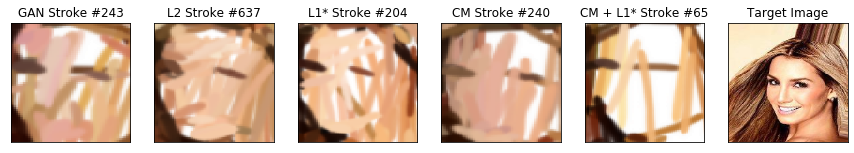

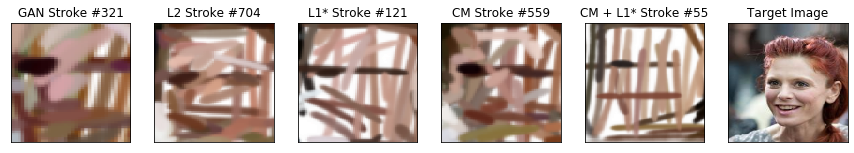

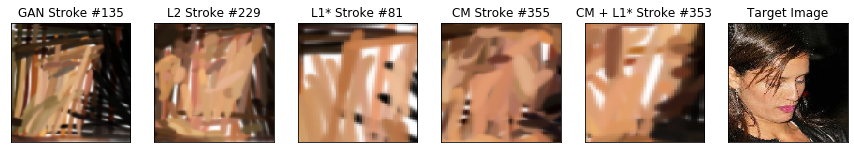

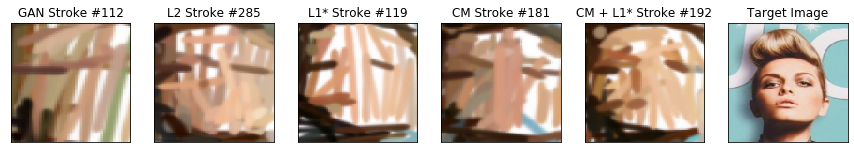

In [17]:
for i in range(min(MAX_IMAGES, 50)):
    gan = actor_results[gan_ind][i]
    l2 = actor_results[l2_ind][i]
    l1 = actor_results[l1_ind][i]
    cm = actor_results[cm_ind][i]
    cm_l1 = actor_results[cm_l1_ind][i]
    if gan['detected_face'] is not None and l2['detected_face'] is not None \
            and l1['detected_face'] is not None and cm['detected_face'] is not None \
            and cm_l1['detected_face'] is not None:
        fig, ax = plt.subplots(1, 6, figsize=(15,4))
        t = gan['detected_face'] - gan['detected_face'].min()
        ax[0].imshow(t / t.max())
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_title('GAN Stroke #' + str(gan['canvas_ind']))
        t = l2['detected_face'] - l2['detected_face'].min()
        ax[1].imshow(t / t.max())
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        ax[1].set_title('L2 Stroke #' + str(l2['canvas_ind']))
        t = l1['detected_face'] - l1['detected_face'].min()
        ax[2].imshow(t / t.max())
        ax[2].set_xticks([])
        ax[2].set_yticks([])
        ax[2].set_title('L1* Stroke #' + str(l1['canvas_ind']))
        t = cm['detected_face'] - cm['detected_face'].min()
        ax[3].imshow(t / t.max())
        ax[3].set_xticks([])
        ax[3].set_yticks([])
        ax[3].set_title('CM Stroke #' + str(cm['canvas_ind']))
        t = cm_l1['detected_face'] - cm_l1['detected_face'].min()
        ax[4].imshow(t / t.max())
        ax[4].set_xticks([])
        ax[4].set_yticks([])
        ax[4].set_title('CM + L1* Stroke #' + str(cm_l1['canvas_ind']))
        
        img = cv2.imread(cm_l1['file_name'], cv2.IMREAD_COLOR)
        img = cv2.resize(img, (width, width))[:,:,::-1]
        ax[5].imshow(img)
        ax[5].set_xticks([])
        ax[5].set_yticks([])
        ax[5].set_title('Target Image')
        plt.show()

## Head to Head which got detected faster score

In [19]:
def head_to_head(ar1, ar2):
    num_better = 0 # where ar1 is better than ar2
    num_worse = 0
    num_ties = 0

    for i in range(MAX_IMAGES):
        a = ar1[i]['canvas_ind']
        b = ar2[i]['canvas_ind']

        if a is None and b is None:
            num_ties += 1
        elif a is None and b is not None:
            num_worse += 1
        elif a is not None and b is None:
            num_better += 1
        elif a > b:
            num_worse += 1
        elif l2 == cm:
            num_ties += 1
        else:
            num_better += 1
    return num_better, num_worse, num_ties
w, l, t = head_to_head(actor_results[cm_l1_ind], actor_results[gan_ind])
print('CML1 vs. GAN :: better ', w, '  worse ', l, '  tied ', t)
w, l, t = head_to_head(actor_results[cm_l1_ind], actor_results[l2_ind])
print('CML1 vs. L2  :: better ', w, '  worse ', l, '  tied ', t)
w, l, t = head_to_head(actor_results[cm_l1_ind], actor_results[l1_ind])
print('CML1 vs. L1  :: better ', w, '  worse ', l, '  tied ', t)
w, l, t = head_to_head(actor_results[cm_l1_ind], actor_results[cm_ind])
print('CML1 vs. CM  :: better ', w, '  worse ', l, '  tied ', t)

w, l, t = head_to_head(actor_results[cm_ind], actor_results[gan_ind])
print('CM vs. GAN   :: better ', w, '  worse ', l, '  tied ', t)
w, l, t = head_to_head(actor_results[cm_ind], actor_results[l2_ind])
print('CM vs. L2    :: better ', w, '  worse ', l, '  tied ', t)
w, l, t = head_to_head(actor_results[cm_ind], actor_results[l1_ind])
print('CM vs. L1    :: better ', w, '  worse ', l, '  tied ', t)

CML1 vs. GAN :: better  3   worse  2   tied  0
CML1 vs. L2  :: better  4   worse  1   tied  0
CML1 vs. L1  :: better  2   worse  3   tied  0
CML1 vs. CM  :: better  4   worse  1   tied  0
CM vs. GAN   :: better  1   worse  3   tied  1
CM vs. L2    :: better  3   worse  1   tied  1
CM vs. L1    :: better  0   worse  5   tied  0


## Avg # strokes to detection
  If not detected, it counts as maximum stroke (750)

In [22]:
l2_total = 0
cm_l1_total = 0
gan_total = 0
l1_total = 0
cm_total = 0
for i in range(MAX_IMAGES):
    l2 = actor_results[l2_ind][i]['canvas_ind']
    cm_l1 = actor_results[cm_l1_ind][i]['canvas_ind']
    gan = actor_results[gan_ind][i]['canvas_ind']
    l1 = actor_results[l1_ind][i]['canvas_ind']
    cm = actor_results[cm_ind][i]['canvas_ind']
    if l2 is not None: 
        l2_total += l2
    else:
        l2_total += 750
    if cm_l1 is not None: 
        cm_l1_total += cm_l1
    else:
        cm_l1_total += 750
    if gan is not None: 
        gan_total += gan
    else:
        gan_total += 750
    if l1 is not None: 
        l1_total += l1
    else:
        l1_total += 750
    if cm is not None: 
        cm_total += cm
    else:
        cm_total += 750
print('L2   = ', l2_total / MAX_IMAGES, '\nCML1 = ', cm_l1_total / MAX_IMAGES,
      '\nGAN  = ', gan_total / MAX_IMAGES, '\nL1   = ', l1_total / MAX_IMAGES, 
      '\nCM   = ', cm_total / MAX_IMAGES)

L2   =  521.0 
CML1 =  302.8 
GAN  =  312.2 
L1   =  187.2 
CM   =  417.0


## Count the number of times a model could not produce a detectable face within the maximum number of strokes

In [34]:
l2_nones = 0
cm_l1_nones = 0
gan_nones = 0
l1_nones = 0
cm_nones = 0

for i in range(MAX_IMAGES):
    l2 = actor_results[0][i]['canvas_ind']
    cm_l1 = actor_results[cm_l1_ind][i]['canvas_ind']
    gan = actor_results[gan_ind][i]['canvas_ind']
    l1 = actor_results[l1_ind][i]['canvas_ind']
    cm = actor_results[cm_ind][i]['canvas_ind']
    if l2 is None: 
        l2_nones += 1
    if cm_l1 is None: 
        cm_l1_nones += 1
    if gan is None: 
        gan_nones += 1
    if l1 is None:
        l1_nones += 1
    if cm is None: 
        cm_nones += 1
print("Number of images undetected:")
print('L2    = ', l2_nones, '\nCM L1 = ', cm_l1_nones,
      '\nGAN   = ', gan_nones, '\nL1    = ', l1_nones, 
      '\nCM    = ', cm_nones, '\n', sep='')

print("Percentage of images undetected:")
print('L2    = ', int(l2_nones/MAX_IMAGES*1000)/10, '%\nCM L1 = ', int(cm_l1_nones/MAX_IMAGES*1000)/10,
      '%\nGAN   = ', int(gan_nones/MAX_IMAGES*1000)/10, '%\nL1    = ', int(l1_nones/MAX_IMAGES*1000)/10, 
      '%\nCM    = ', int(cm_nones/MAX_IMAGES*1000)/10, '%', sep='')

Number of images undetected:
L2    = 1
CM L1 = 0
GAN   = 1
L1    = 0
CM    = 1

Percentage of images undetected:
L2    = 20.0%
CM L1 = 0.0%
GAN   = 20.0%
L1    = 0.0%
CM    = 20.0%


## Avg. diff in num strokes to detection
Only consider cases where both models had a face detected in under the maximum number of strokes

In [37]:
def avg_diff(ar1, ar2):
    total_diff = 0
    n = 0
    for i in range(len(ar1)):
        a = ar1[i]['canvas_ind']
        b = ar2[i]['canvas_ind']
#         if a is None: a = 750
#         if b is None: b = 750
#         total_diff += (a - b)
#         n += 1
        if a is not None and b is not None:
            n += 1
            total_diff += (a - b)
    return n, total_diff / n
n, diff = avg_diff(actor_results[cm_l1_ind], actor_results[gan_ind])
print('n = ', n, '  cml1 - gan = ', diff)
n, diff = avg_diff(actor_results[cm_l1_ind], actor_results[l2_ind])
print('n = ', n, '  cml1 - l2 = ', diff)
n, diff = avg_diff(actor_results[cm_l1_ind], actor_results[l1_ind])
print('n = ', n, '  cml1 - l1 = ', diff)

n, diff = avg_diff(actor_results[cm_ind], actor_results[l2_ind])
print('n = ', n, '  cm - l2 = ', diff)
n, diff = avg_diff(actor_results[cm_ind], actor_results[l1_ind])
print('n = ', n, '  cm - l1 = ', diff)
n, diff = avg_diff(actor_results[cm_ind], actor_results[cm_l1_ind])
print('n = ', n, '  cm - cml1 = ', diff)

n =  4   cml1 - gan =  -36.5
n =  4   cml1 - l2 =  -297.5
n =  5   cml1 - l1 =  115.6
n =  4   cm - l2 =  -130.0
n =  4   cm - l1 =  202.5
n =  4   cm - cml1 =  167.5


In [39]:
import pandas as pd
import numpy as np

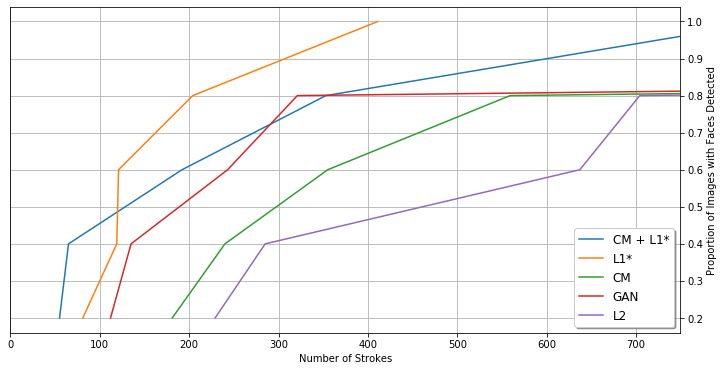

In [41]:
def cdf(actor_results, indices, columns):
    ar = [[] for i in range(len(indices))]
    i = 0
    for actor_ind in indices:
        for j in range(len(actor_results[actor_ind])):
            ar[i].append(actor_results[actor_ind][j]['canvas_ind'])
        i += 1

    ar = np.array(ar).T
    ar[ar == None] = 7500

    df = pd.DataFrame(
        ar,
        columns = columns)
    
    fig, ax = plt.subplots(figsize=(12,6))
    
    for col in columns:
        # Frequency
        stats_df = df \
                .groupby(col) \
                [col] \
                .agg('count') \
                .pipe(pd.DataFrame) \
                .rename(columns = {col: 'frequency'})

        # PDF
        stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

        # CDF
        stats_df['cdf'] = stats_df['pdf'].cumsum()
        stats_df = stats_df.reset_index()
        
        ax.plot(stats_df[col], stats_df['cdf'], label=col)
        
    ax.legend(loc='lower right', shadow=True, fontsize='large')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_xlabel("Number of Strokes")
    ax.set_ylabel("Proportion of Images with Faces Detected")
    plt.xlim((0, 749))
    plt.grid()
    plt.show()
cdf(actor_results, [cm_l1_ind, l1_ind, cm_ind, gan_ind, l2_ind], ['CM + L1*', 'L1*', 'CM', 'GAN', 'L2'])

## Plot histograms plotting the difference in density of images detected when

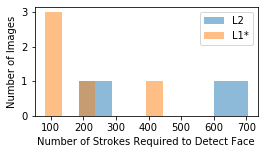

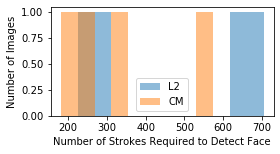

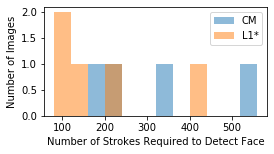

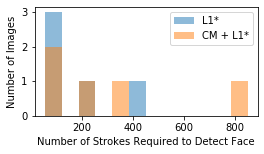

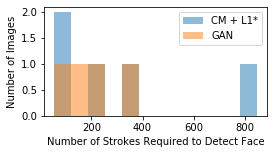

In [38]:
def histogram(actor_results, indices, columns):
    ar = [[] for i in range(len(indices))]
    i = 0
    for actor_ind in indices:
        for j in range(len(actor_results[actor_ind])):
            ar[i].append(actor_results[actor_ind][j]['canvas_ind'])
        i += 1

    ar = np.array(ar).T

    df = pd.DataFrame(
        ar,
        columns = columns)

    ax = df.plot.hist(bins=12, alpha=0.5, figsize=(4,2))
    ax.set_xlabel("Number of Strokes Required to Detect Face")
    ax.set_ylabel("Number of Images")
    plt.show()

histogram(actor_results, [l2_ind, l1_ind], ['L2', 'L1*'])
histogram(actor_results, [l2_ind, cm_ind], ['L2', 'CM'])
histogram(actor_results, [cm_ind, l1_ind], ['CM', 'L1*'])
histogram(actor_results, [l1_ind, cm_l1_ind], ['L1*', 'CM + L1*'])
histogram(actor_results, [cm_l1_ind, gan_ind], ['CM + L1*', 'GAN'])